## Binary Classification with Different Activation Functions Using CNN
#### Explanation:
This code performs binary classification on an image dataset using a Convolutional Neural Network (CNN) with different activation functions. It loads and preprocesses the images, creates a CNN model for each activation function, trains the model, evaluates its accuracy, and plots the results. The aim is to compare how different activation functions affect the model's performance on a binary classification task.

## Loading All libraries which are required¶

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


## loading the dataset
## Initialization of ImageDataGenerator with Normalization and Validation Split
#### rescale=1.0/255:
This parameter scales the pixel values of the images from the range [0, 255] to [0, 1]. Pixel values in images are typically between 0 and 255. Dividing by 255 normalizes these values, which can help the neural network train more effectively and efficiently by having input values in a consistent range.

#### validation_split=0.2:
This parameter reserves 20% of the data for validation purposes. The remaining 80% will be used for training. This split is useful for assessing the model's performance on a separate subset of data that it hasn't seen during training, helping to evaluate how well the model generalizes to new data.

In [2]:
data_dir = "D:\ML A-Z\Deep Learning\Activation Functions\Binary Classification"

# Image data generator with validation split
datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)


## Creating a Training Data Generator from Directory with Preprocessing and Batch Settings
datagen.flow_from_directory():
This method generates batches of images and their corresponding labels from a directory structure.

#### data_dir:
Specifies the path to the directory containing the image data organized into subdirectories by class.

#### target_size=(64, 64):
Resizes all images to 64x64 pixels. This ensures that all images have the same dimensions before feeding them into the model.

#### class_mode='categorical':
Indicates that the labels are categorical (e.g., one-hot encoded). This is used for multi-class classification problems.

### subset='training':
Specifies that this generator is for the training subset of the data, as defined by the validation_split parameter used when initializing the ImageDataGenerator.

In [3]:
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',  
    subset='training'
)

Found 558 images belonging to 2 classes.


## Function to Create a Convolutional Neural Network Model with Specified Activation Function
This function, create_model(activation), defines and compiles a Convolutional Neural Network (CNN) with the specified activation function. Here’s how it works:

##### Model Initialization:
model = Sequential(): Initializes a Sequential model, which is a linear stack of layers.

##### model.add(MaxPooling2D(pool_size=(2, 2))):
Adds a max pooling layer to reduce the spatial dimensions by taking the maximum value in a 2x2 pool.

#### Additional Convolutional Layers:
model.add(Conv2D(32, (3, 3), activation=activation)):
Adds another convolutional layer with 32 filters of size 3x3 and the specified activation function.

##### model.add(MaxPooling2D(pool_size=(2, 2))):
Adds another max pooling layer.

#### Flatten and Dense Layers:
### model.add(Dense(64, activation=activation)):
Adds a fully connected (dense) layer with 64 units and the specified activation function.

### Output Layer:
###### model.add(Dense(train_generator.num_classes, activation='softmax')):
Adds a dense layer with a number of units equal to the number of classes in the dataset, using the 'softmax' activation function to output class probabilities.

#### Compilation:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']): Compiles the model with the Adam optimizer, categorical cross-entropy loss function, and accuracy as the evaluation metric.

##### Return:
return model: Returns the compiled model.

In [5]:
def create_model(activation):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation=activation, input_shape=(64, 64, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, (3, 3), activation=activation))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation=activation))
    model.add(Dense(1, activation='sigmoid'))  # Change to sigmoid for binary classification
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Change loss to binary_crossentropy
    return model

## Creating a Validation Data Generator from Directory with Preprocessing and Batch Settings
This line of code sets up a data generator for validation by reading and preprocessing images from a  specified directory:

### datagen.flow_from_directory():
This method generates batches of images and labels from a directory structure.

#### data_dir:
Path to the directory containing the image dataset organized into subdirectories by class.

#### target_size=(64, 64):
Resizes all images to 64x64 pixels to ensure uniform input size for the model.

#### batch_size=32:
Specifies the number of images to be included in each batch for validation.

#### class_mode='categorical':
Indicates that labels are categorical (one-hot encoded), suitable for multi-class classification.

#### subset='validation':
Indicates that this generator is for the validation subset of the data, as defined by the validation_split parameter in the ImageDataGenerator.

In [10]:
validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',  # Change to binary
    subset='validation'
)

Found 138 images belonging to 2 classes.


In [6]:
activation_functions = ['relu', 'sigmoid', 'tanh', 'elu', 'selu', 'softplus', 'softsign', 'exponential', 'swish', 'hard_sigmoid']


In [11]:
results = {}

# Loop through the activation functions
for activation in activation_functions:
    print(f"Training with activation function: {activation}")
    model = create_model(activation)
    model.fit(train_generator, epochs=5, validation_data=validation_generator, verbose=0)  # Adjust epochs as needed
    
    # Evaluate the model
    loss, accuracy = model.evaluate(validation_generator, verbose=0)
    results[activation] = accuracy
    print(f"Accuracy with {activation}: {accuracy:.4f}")

Training with activation function: relu
Accuracy with relu: 0.9420
Training with activation function: sigmoid
Accuracy with sigmoid: 0.5145
Training with activation function: tanh
Accuracy with tanh: 0.9130
Training with activation function: elu
Accuracy with elu: 0.9130
Training with activation function: selu
Accuracy with selu: 0.9493
Training with activation function: softplus
Accuracy with softplus: 0.5145
Training with activation function: softsign
Accuracy with softsign: 0.9130
Training with activation function: exponential
Accuracy with exponential: 0.5145
Training with activation function: swish
Accuracy with swish: 0.9130
Training with activation function: hard_sigmoid
Accuracy with hard_sigmoid: 0.5145


In [12]:
print("\nFinal Results:")
for activation, accuracy in results.items():
    print(f"{activation}: {accuracy:.4f}")


Final Results:
relu: 0.9420
sigmoid: 0.5145
tanh: 0.9130
elu: 0.9130
selu: 0.9493
softplus: 0.5145
softsign: 0.9130
exponential: 0.5145
swish: 0.9130
hard_sigmoid: 0.5145


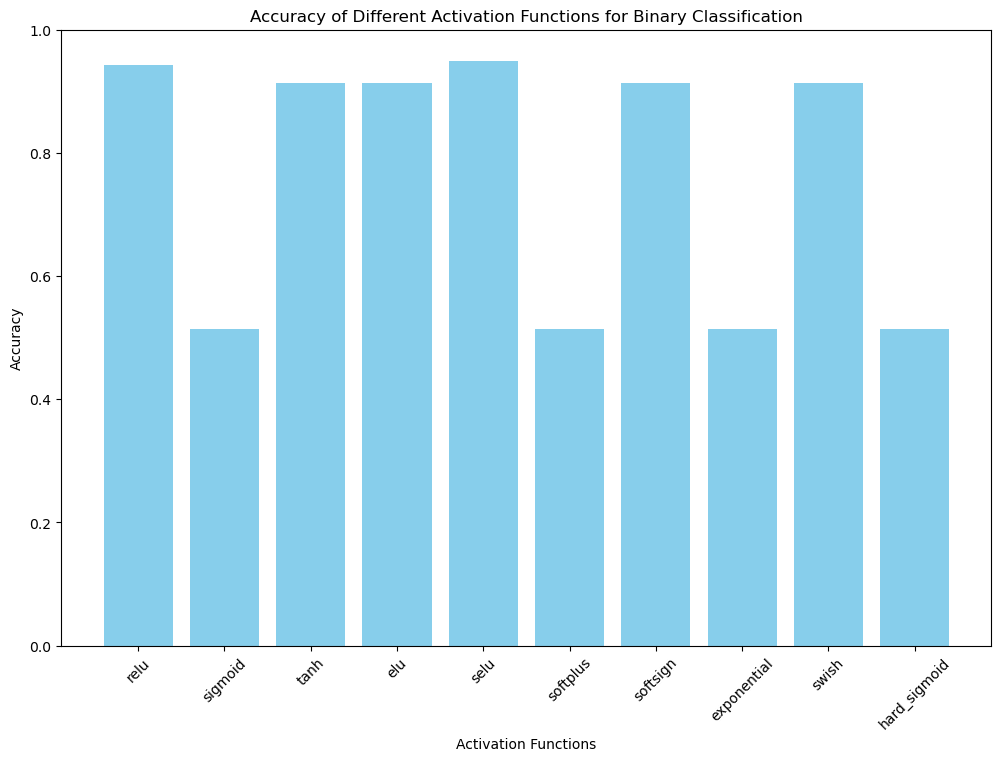

In [13]:
plt.figure(figsize=(12, 8))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.xlabel('Activation Functions')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Activation Functions for Binary Classification')
plt.ylim(0, 1)  # Assuming accuracy values are between 0 and 1
plt.xticks(rotation=45)
plt.show()